# **Importing libraries**

In [108]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# **Load Dataset**

In [109]:
dataset = pd.read_csv('/content/international_matches.csv')
 
dataset.head()



,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
dataset.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

In [111]:
dataset.shape

(23921, 25)

In [112]:
#All the information about the dataset 
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [113]:
#Statistic Summary
dataset.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


# **Preprocessing**

In [114]:
#find the Null values
dataset.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [115]:
# droping the null value enteries drop null 
dataset.dropna(inplace=True)
dataset

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
8264,2004-09-03,Spain,Scotland,Europe,Europe,3,67,0,0,1,...,No,Draw,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
8266,2004-09-04,Austria,England,Europe,Europe,90,7,0,0,2,...,No,Draw,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
8271,2004-09-04,Croatia,Hungary,Europe,Europe,25,76,0,0,3,...,No,Win,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
8276,2004-09-04,Iceland,Bulgaria,Europe,Europe,80,41,0,0,1,...,No,Lose,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5
8278,2004-09-04,Italy,Norway,Europe,Europe,9,38,0,0,2,...,No,Win,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,No,Lose,87.0,89.0,75.2,84.7,75.8,80.8,85.7,85.5
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2


<Axes: >

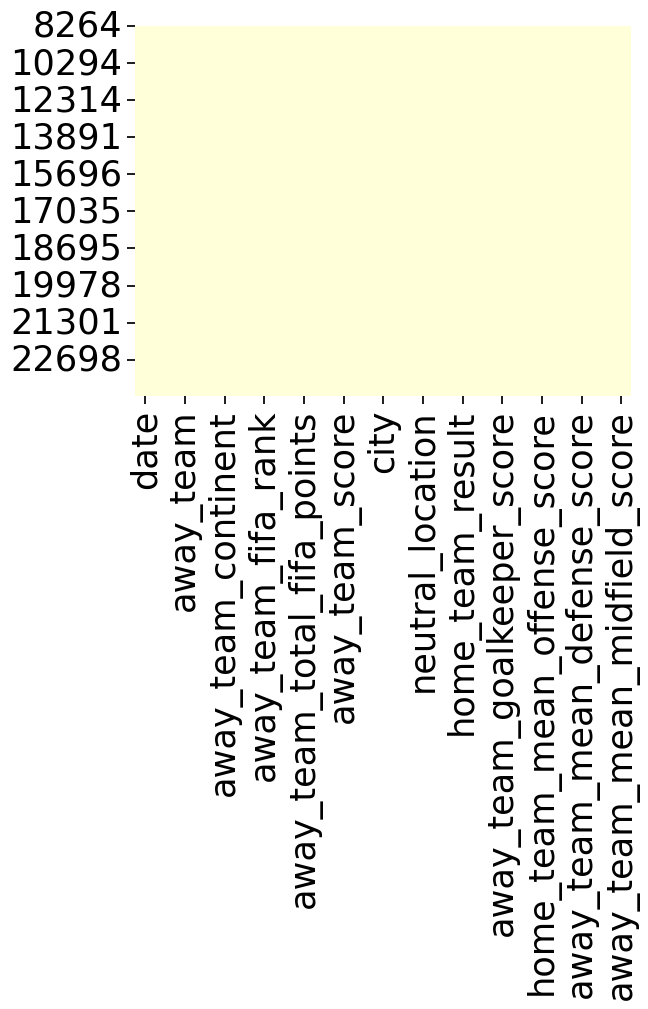

In [116]:
#CHECKING NULL VALUES from the graph
sns.heatmap(dataset.isnull(), cbar=False, cmap="YlGnBu")

# **Checking Outliear**

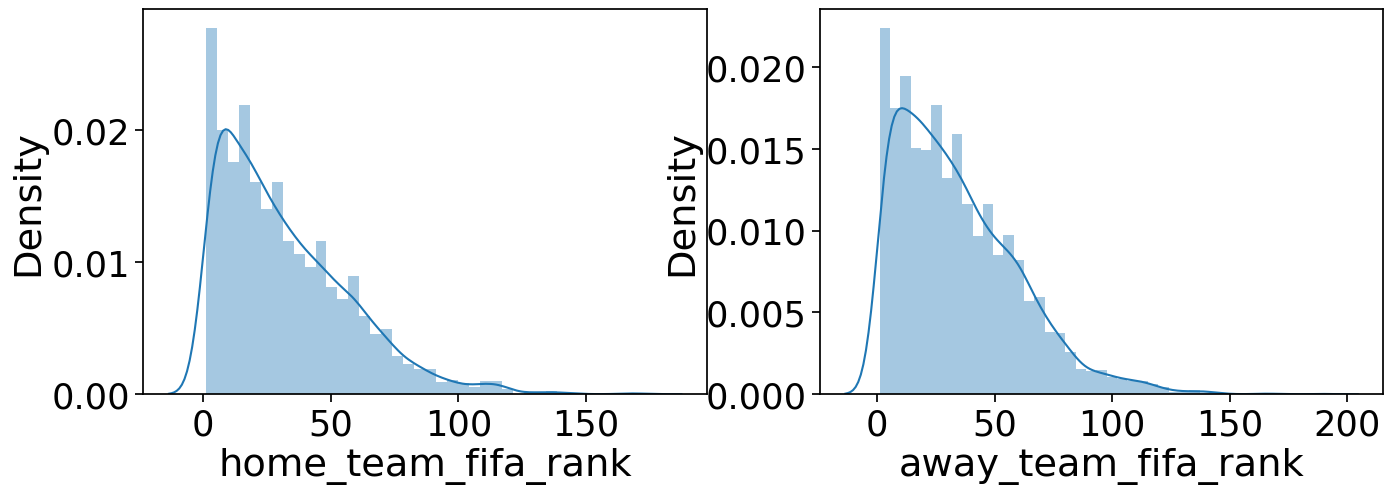

In [117]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataset['home_team_fifa_rank'])
plt.subplot(1,2,2)
sns.distplot(dataset['away_team_fifa_rank'])
plt.show()

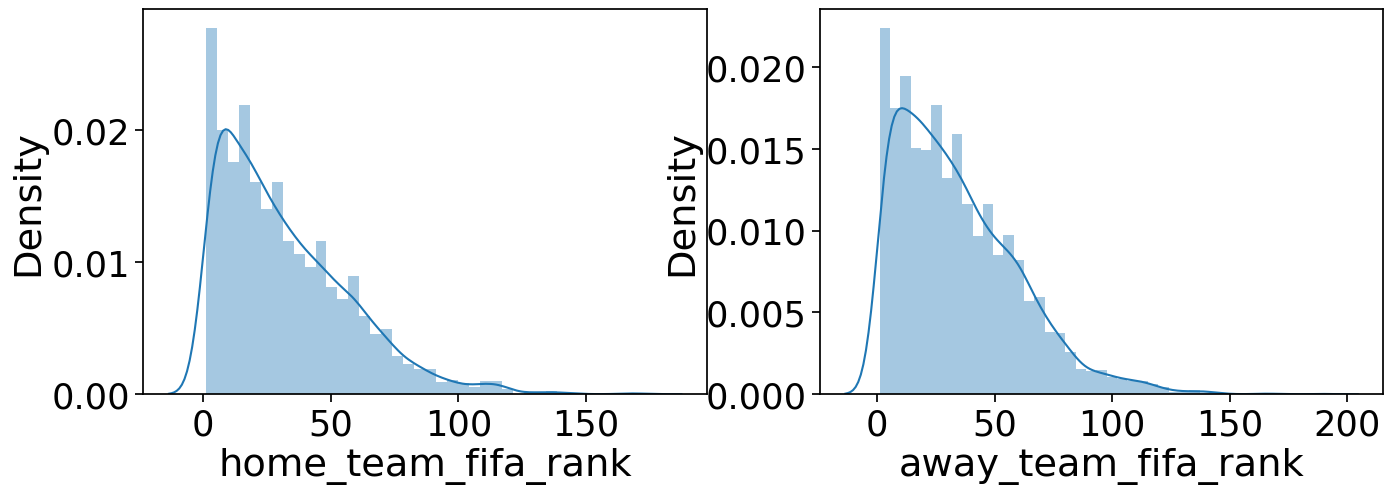

In [118]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataset['home_team_fifa_rank'])
plt.subplot(1,2,2)
sns.distplot(dataset['away_team_fifa_rank'])
plt.show()

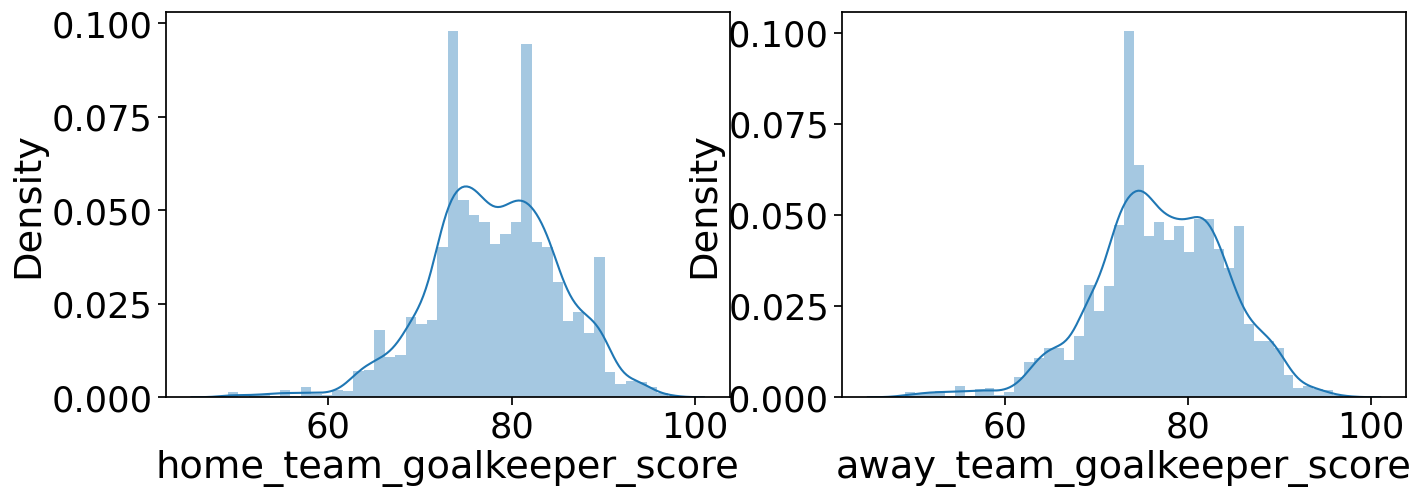

In [119]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataset['home_team_goalkeeper_score'])
plt.subplot(1,2,2)
sns.distplot(dataset['away_team_goalkeeper_score'])
plt.show()

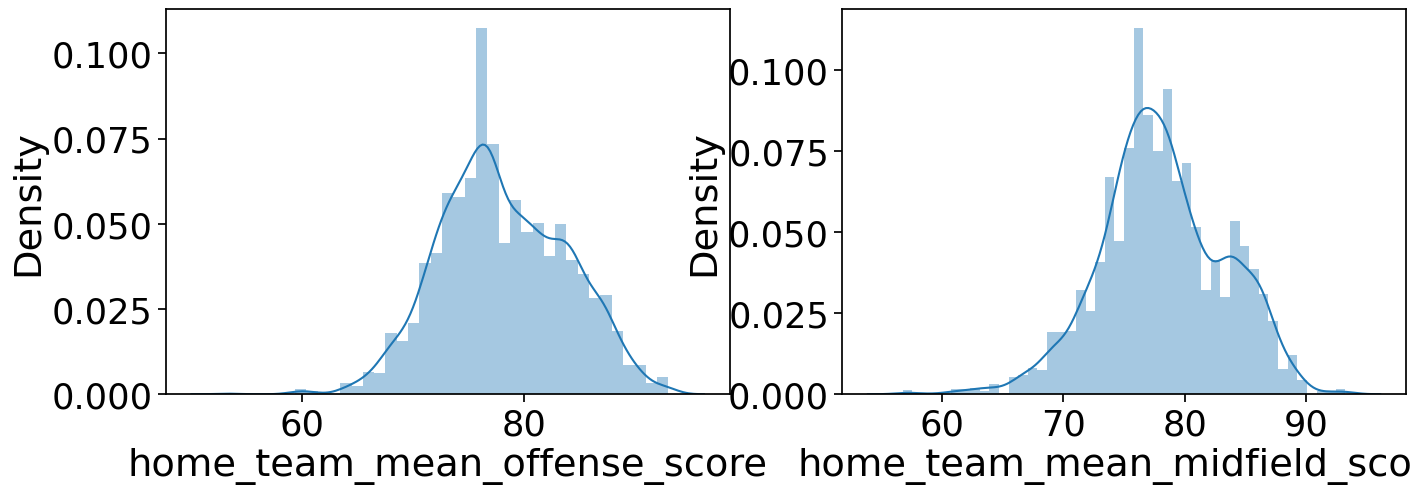

In [120]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataset['home_team_mean_offense_score'])
plt.subplot(1,2,2)
sns.distplot(dataset['home_team_mean_midfield_score'])
plt.show()

# **Removing the Outliear**

# **Removing the Outliear**

In [121]:
for x in ['home_team_fifa_rank','away_team_fifa_rank','home_team_total_fifa_points','away_team_total_fifa_points','home_team_score']:
    q75,q25 = np.percentile(dataset.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dataset.loc[dataset[x] < min,x] = np.nan
    dataset.loc[dataset[x] > max,x] = np.nan

# **Removing Outlier**

In [122]:
dataset.isnull().sum()

date                              0
home_team                         0
away_team                         0
home_team_continent               0
away_team_continent               0
home_team_fifa_rank              87
away_team_fifa_rank              76
home_team_total_fifa_points       0
away_team_total_fifa_points       0
home_team_score                  35
away_team_score                   0
tournament                        0
city                              0
country                           0
neutral_location                  0
shoot_out                         0
home_team_result                  0
home_team_goalkeeper_score        0
away_team_goalkeeper_score        0
home_team_mean_defense_score      0
home_team_mean_offense_score      0
home_team_mean_midfield_score     0
away_team_mean_defense_score      0
away_team_mean_offense_score      0
away_team_mean_midfield_score     0
dtype: int64

In [123]:
data = dataset.dropna(axis = 0)

In [124]:
data.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

In [125]:
data['home_team_fifa_rank'].replace(['YES', 'NO'],[1,0], inplace=True)

data['home_team_total_fifa_points'].replace(['YES', 'NO'],[1,0], inplace=True)

data['home_team_goalkeeper_score'].replace(['YES', 'NO'],[1,0], inplace=True)

data['home_team_score'].replace(['YES', 'NO'],[1,0], inplace=True)

data['home_team_mean_defense_score'].replace(['YES', 'NO'],[1,0], inplace=True)

data['home_team_mean_offense_score'].replace(['YES', 'NO'],[1,0], inplace=True)

data['away_team_fifa_rank'].replace(['YES', 'NO'],[1,0], inplace=True)

data['away_team_total_fifa_points'].replace(['YES', 'NO'],[1,0], inplace=True)

data['away_team_goalkeeper_score'].replace(['YES', 'NO'],[1,0], inplace=True)

data['away_team_score'].replace(['YES', 'NO'],[1,0], inplace=True)

data['away_team_mean_defense_score'].replace(['YES', 'NO'],[1,0], inplace=True)

data['away_team_mean_offense_score'].replace(['YES', 'NO'],[1,0], inplace=True)

data.head(5)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
8264,2004-09-03,Spain,Scotland,Europe,Europe,3.0,67.0,0.0,0.0,1.0,...,No,Draw,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
8266,2004-09-04,Austria,England,Europe,Europe,90.0,7.0,0.0,0.0,2.0,...,No,Draw,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
8271,2004-09-04,Croatia,Hungary,Europe,Europe,25.0,76.0,0.0,0.0,3.0,...,No,Win,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
8276,2004-09-04,Iceland,Bulgaria,Europe,Europe,80.0,41.0,0.0,0.0,1.0,...,No,Lose,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5
8278,2004-09-04,Italy,Norway,Europe,Europe,9.0,38.0,0.0,0.0,2.0,...,No,Win,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0


# **Data Exploration and Visualization**

In [126]:
data.head()


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
8264,2004-09-03,Spain,Scotland,Europe,Europe,3.0,67.0,0.0,0.0,1.0,...,No,Draw,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
8266,2004-09-04,Austria,England,Europe,Europe,90.0,7.0,0.0,0.0,2.0,...,No,Draw,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
8271,2004-09-04,Croatia,Hungary,Europe,Europe,25.0,76.0,0.0,0.0,3.0,...,No,Win,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
8276,2004-09-04,Iceland,Bulgaria,Europe,Europe,80.0,41.0,0.0,0.0,1.0,...,No,Lose,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5
8278,2004-09-04,Italy,Norway,Europe,Europe,9.0,38.0,0.0,0.0,2.0,...,No,Win,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0


<Axes: >

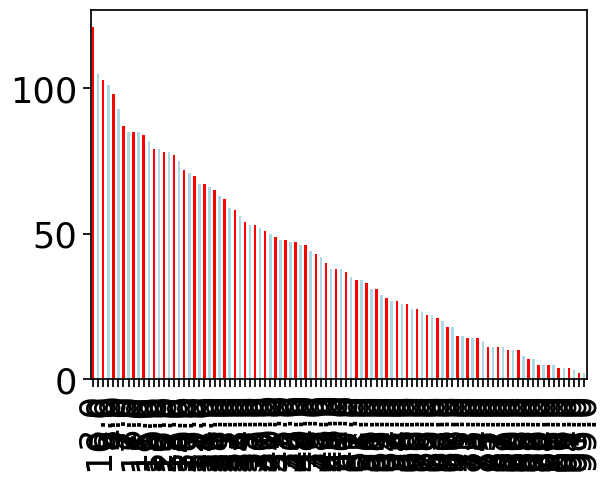

In [127]:
#bar chart
data["home_team_fifa_rank"].value_counts().plot(kind='bar', color=["Red","lightblue"])

In [128]:
DATA = data[['city','home_team_score','away_team_score']]
DATA.head()


,city,home_team_score,away_team_score
8264,Valencia,1.0,1
8266,Vienna,2.0,2
8271,Zagreb,3.0,0
8276,Reykjavík,1.0,3
8278,Palermo,2.0,1


In [129]:
DATA['home_team_score']>DATA['away_team_score']

home_wins = DATA.loc[DATA['home_team_score']>DATA['away_team_score']]

home_wins

,city,home_team_score,away_team_score
8271,Zagreb,3.0,0
8278,Palermo,2.0,1
8314,San José,1.0,0
8322,Budapest,3.0,2
8335,Amsterdam,2.0,0
...,...,...,...
23884,Copenhagen,2.0,0
23890,Al Rayyan,1.0,0
23907,Mönchengladbach,5.0,2
23908,Rotterdam,3.0,2


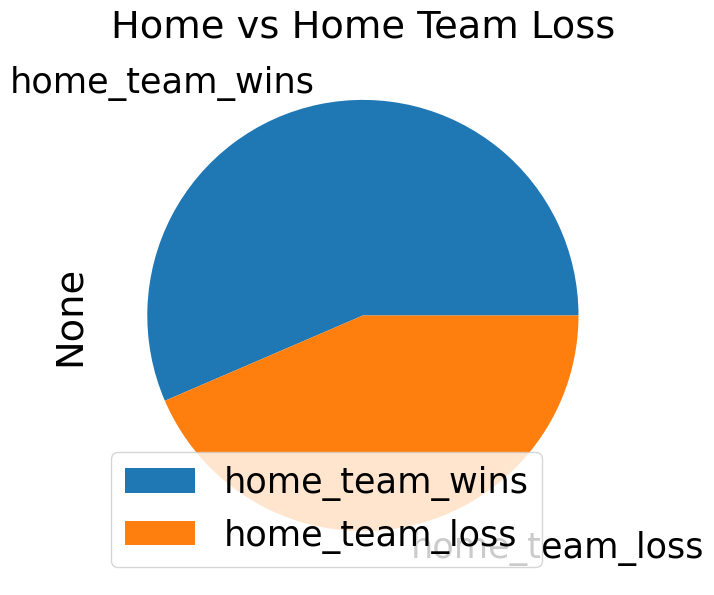

In [130]:
DATA.mean().plot(kind = 'pie',title= 'Home vs Home Team Loss', labels = ['home_team_wins','home_team_loss'],figsize = (7,7))

plt.legend();

# **check the correlation between various features**

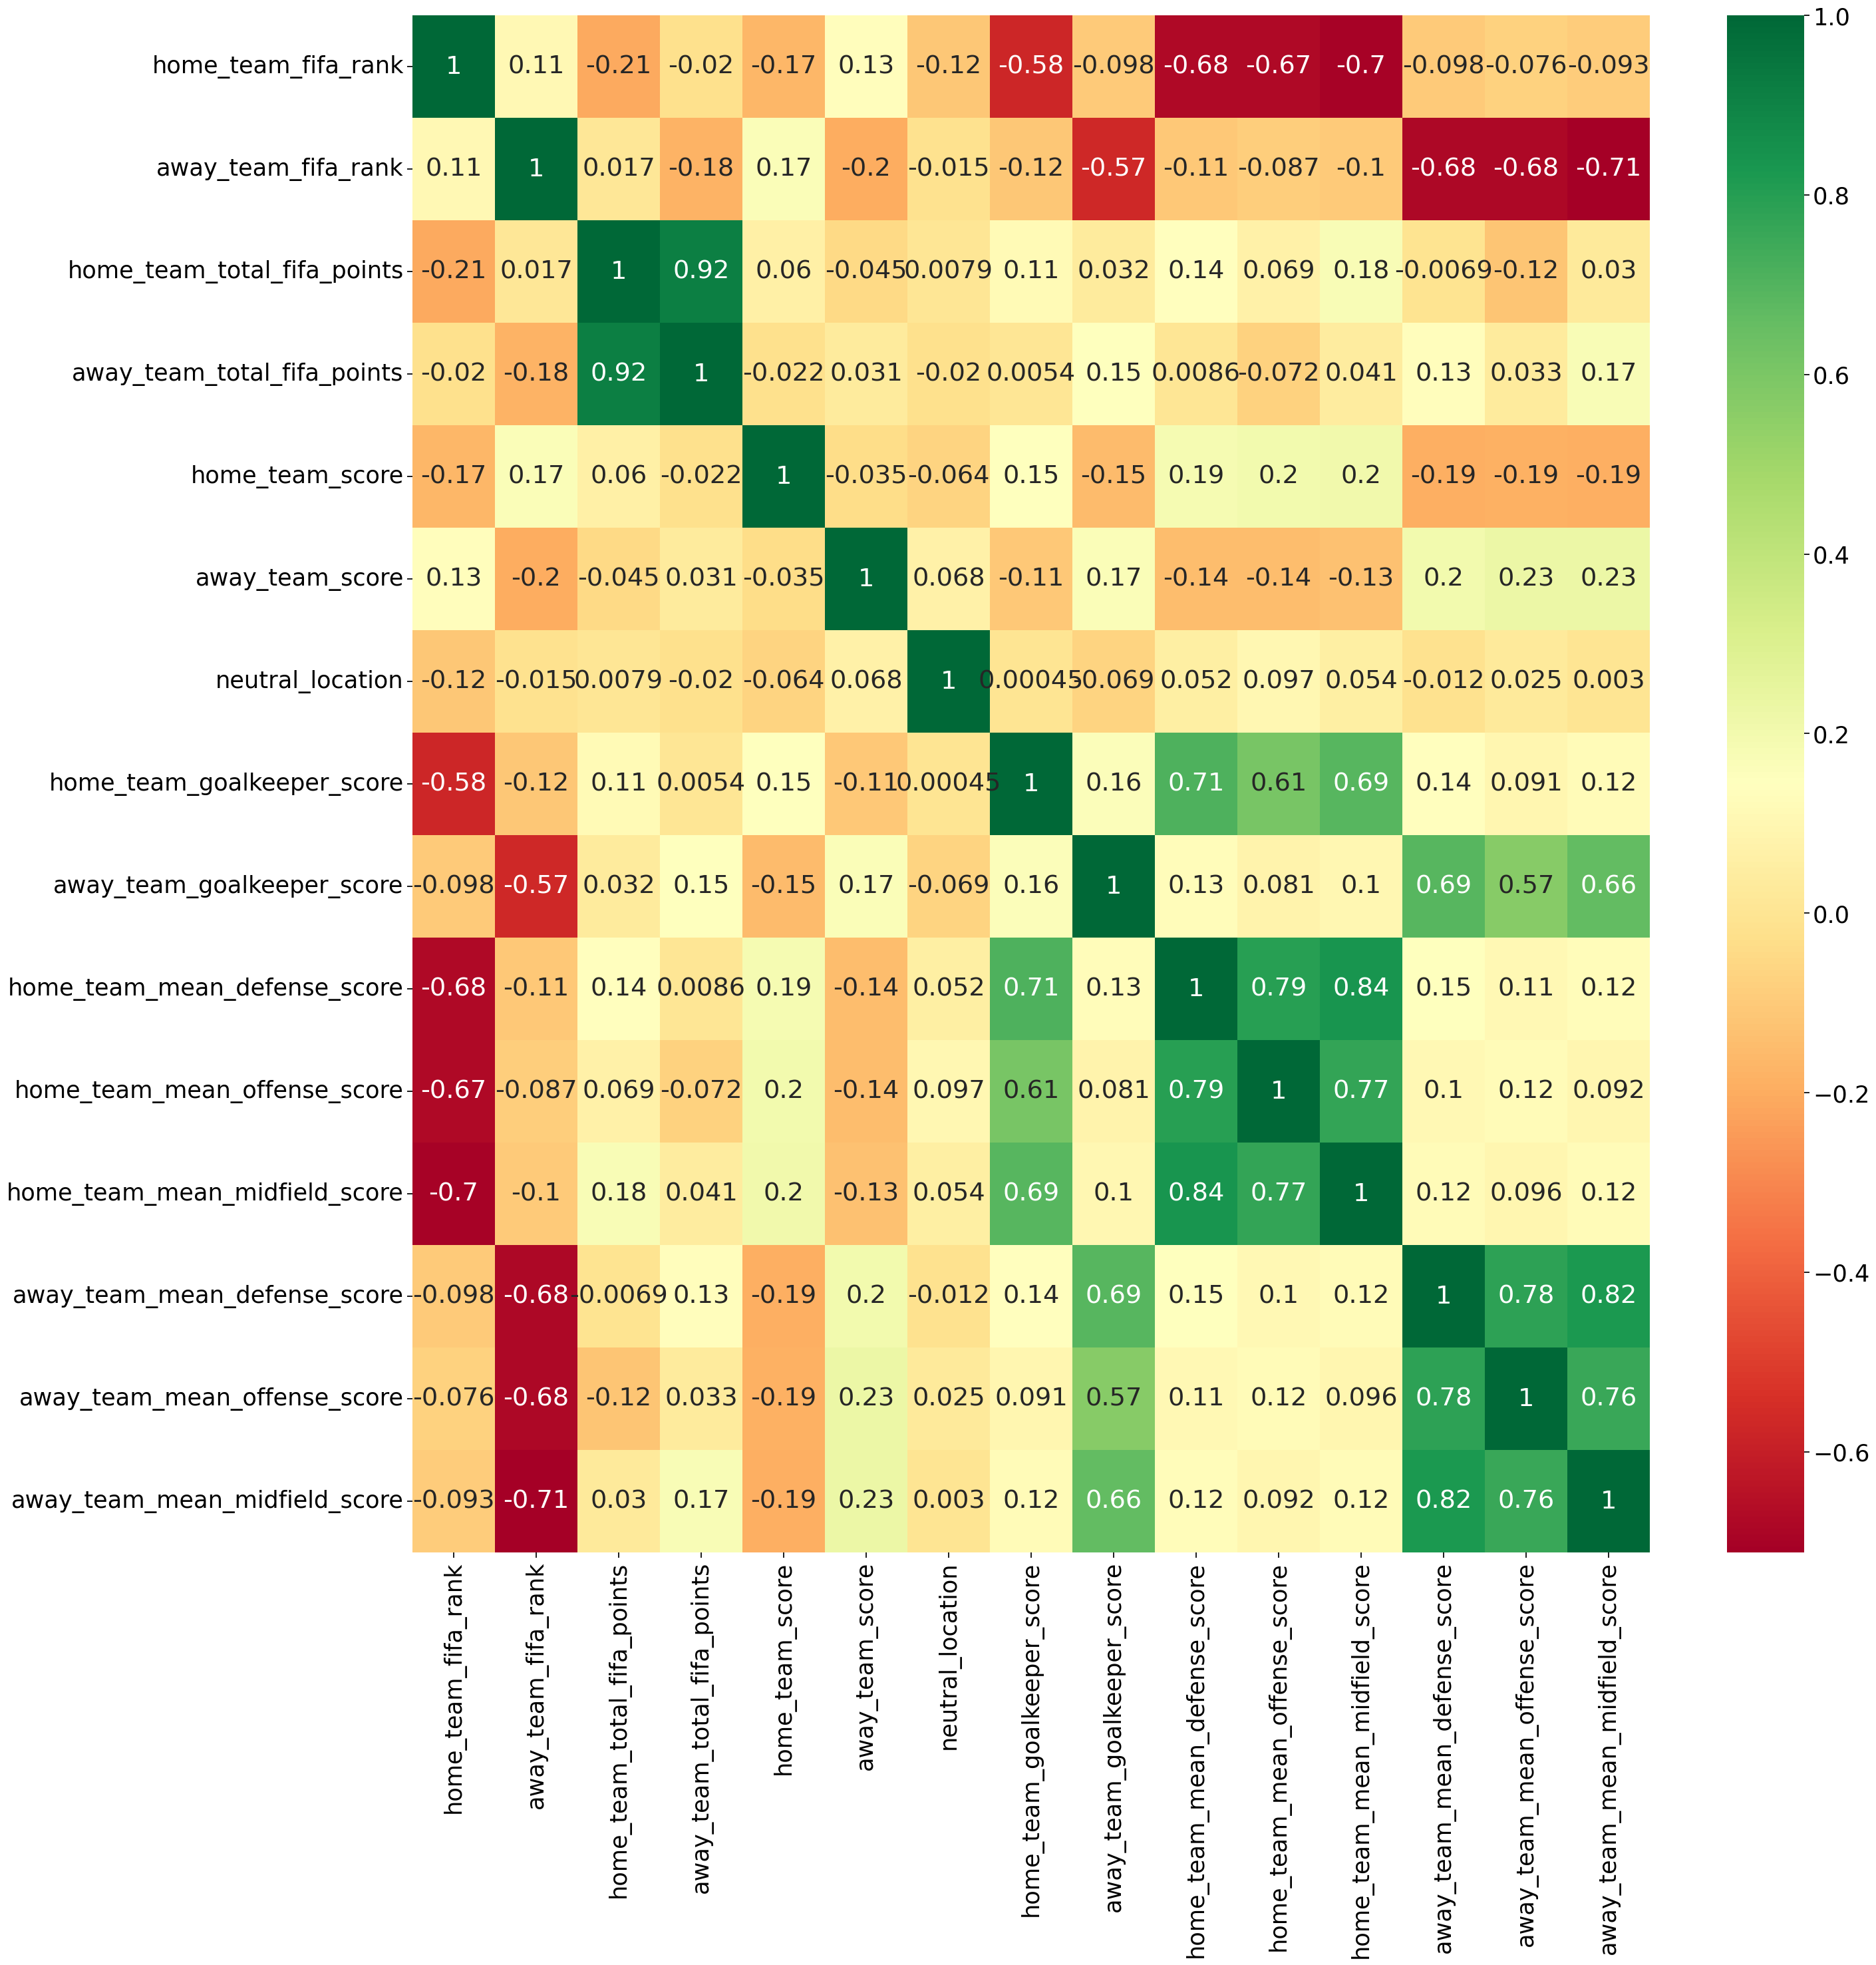

In [131]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

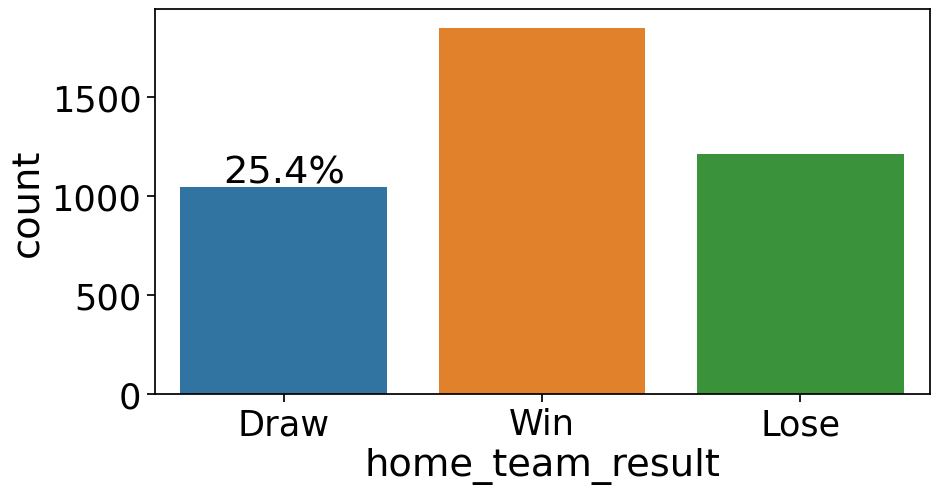

In [145]:
plt.figure(figsize = (10,5))
total = float(len(data))
ax = sns.countplot(x= 'home_team_result', data=data)
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  width = p.get_width()
  height = p.get_height()
  x,y = p.get_xy()
  ax.annotate(percentage, (x + width/2, y+height*1.02), ha ='center')
  plt.show()

Text(0.5, 1.0, 'Number of  football  matches won by each team')

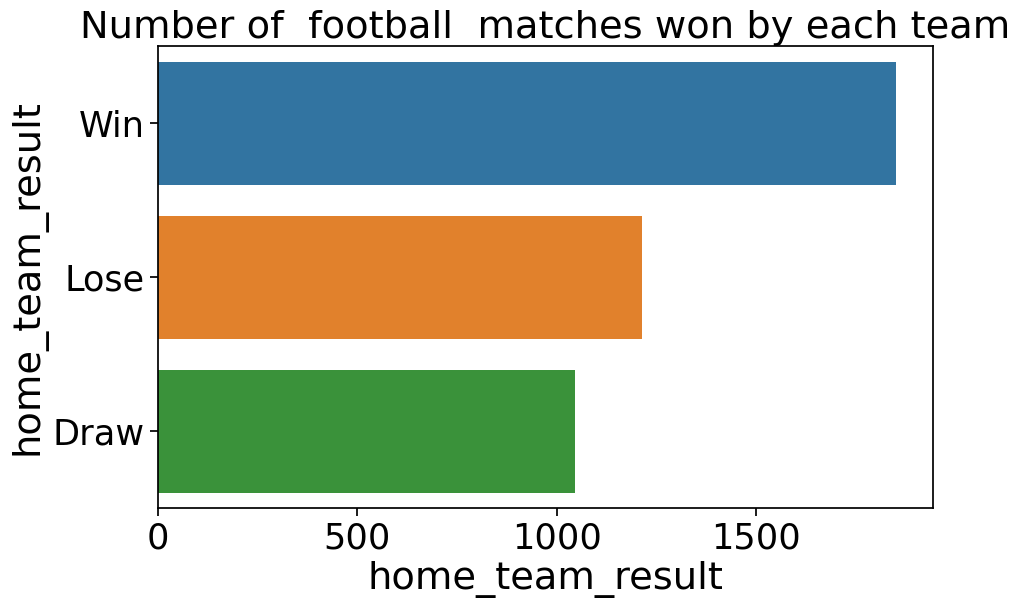

In [149]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'home_team_result',data = data,order= data['home_team_result'].value_counts().index)
plt.xlabel('home_team_result')
plt.ylabel('home_team_result')
plt.title('Number of  football  matches won by each team')

# **LABEL ENCODING**

In [154]:
			
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
final_data=data.drop(columns=['away_team_mean_midfield_score','away_team_mean_offense_score'],axis=1)
final_data=data.drop(columns=['home_team_mean_defense_score'],axis=1)
final_data=data.drop(columns=['home_team_mean_offense_score','home_team_mean_midfield_score','away_team_mean_defense_score'],axis=1) # FINAL DATA FRAME IN WHICH APPLYING ML
final_data['home_team_goalkeeper_score']=data['home_team_goalkeeper_score'].astype('float64')
final_data['away_team_goalkeeper_score']=data['away_team_goalkeeper_score'].astype('int')
final_data['home_team_fifa_rank']=data['home_team_fifa_rank'].astype('float64')
final_data['home_team_total_fifa_points']=data['home_team_total_fifa_points'].astype('int')
final_data

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
8264,2004-09-03,Spain,Scotland,Europe,Europe,3.0,67.0,0,0.0,1.0,...,Valencia,Spain,False,No,Draw,94.0,84,86.5,79.7,81.8
8266,2004-09-04,Austria,England,Europe,Europe,90.0,7.0,0,0.0,2.0,...,Vienna,Austria,False,No,Draw,83.0,88,76.2,88.7,91.2
8271,2004-09-04,Croatia,Hungary,Europe,Europe,25.0,76.0,0,0.0,3.0,...,Zagreb,Croatia,False,No,Win,77.0,74,80.5,75.7,70.2
8276,2004-09-04,Iceland,Bulgaria,Europe,Europe,80.0,41.0,0,0.0,1.0,...,Reykjavík,Iceland,False,No,Lose,78.0,78,68.8,79.7,78.5
8278,2004-09-04,Italy,Norway,Europe,Europe,9.0,38.0,0,0.0,2.0,...,Palermo,Italy,False,No,Win,97.0,79,91.8,81.3,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23909,2022-06-14,Poland,Belgium,Europe,Europe,26.0,2.0,1544,1827.0,0.0,...,Warsaw,Poland,False,No,Lose,87.0,89,75.2,85.7,85.5
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27.0,47.0,1535,1449.0,1.0,...,Łódź,Poland,True,No,Draw,75.0,75,74.8,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59.0,57.0,1388,1406.0,3.0,...,Zenica,Bosnia and Herzegovina,False,No,Win,76.0,83,74.2,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48.0,70.0,1446,1342.0,0.0,...,Bucharest,Romania,False,No,Lose,77.0,65,73.5,74.7,68.2


In [155]:
final_data_Transform=final_data.apply(le.fit_transform)
final_data_Transform

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
8264,0,72,67,2,2,2,66,0,0,1,...,561,86,0,0,0,44,34,96,49,77
8266,1,4,29,2,2,89,6,0,0,2,...,567,5,0,0,0,33,38,55,76,110
8271,1,21,38,2,2,24,75,0,0,3,...,596,24,0,0,2,27,24,72,37,31
8276,1,39,11,2,2,79,40,0,0,1,...,444,44,0,0,1,28,28,25,49,64
8278,1,41,57,2,2,8,37,0,0,2,...,399,47,0,0,2,46,29,107,54,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23909,1121,60,6,2,2,25,1,883,1038,0,...,581,69,0,0,1,37,39,51,67,92
23911,1121,80,63,2,2,26,46,875,808,1,...,607,69,1,0,0,25,25,49,28,45
23912,1121,8,30,2,2,58,56,737,769,3,...,599,11,0,0,2,26,33,47,27,44
23913,1121,63,50,2,2,47,69,792,715,0,...,86,73,0,0,1,27,15,44,34,23


# **Modeling**
# **Splitting our Dataset**

In [160]:
from sklearn.model_selection import train_test_split

X = final_data_Transform.drop('home_team_result', axis=1)
y = final_data_Transform.home_team_result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [161]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# **Logistic Regression**

In [162]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.20%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1            2  accuracy    macro avg  \
precision    1.000000    0.977038     0.997699     0.992     0.991579   
recall       0.987306    0.997655     0.990861     0.992     0.991941   
f1-score     0.993612    0.987239     0.994268     0.992     0.991707   
support    709.000000  853.000000  1313.000000     0.992  2875.000000   

           weighted avg  
precision      0.992137  
recall         0.992000  
f1-score       0.992021  
support     2875.000000  
_______________________________________________
Confusion Matrix: 
 [[ 700    8    1]
 [   0  851    2]
 [   0   12 1301]]

Test Result:
Accuracy Score: 98.46%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy    macro avg  \
precision    1.000000    0.959677    0.992467   0.98459     0.984048   
recall       0.982143

In [163]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,99.2,98.459043


# **Decision Tree Classifier**

In [164]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1       2  accuracy  macro avg  weighted avg
precision    1.0    1.0     1.0       1.0        1.0           1.0
recall       1.0    1.0     1.0       1.0        1.0           1.0
f1-score     1.0    1.0     1.0       1.0        1.0           1.0
support    709.0  853.0  1313.0       1.0     2875.0        2875.0
_______________________________________________
Confusion Matrix: 
 [[ 709    0    0]
 [   0  853    0]
 [   0    0 1313]]

Test Result:
Accuracy Score: 98.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy    macro avg  \
precision    0.991150    0.980501    0.990654  0.987835     0.987435   
recall       1.000000    0.977778    0.986965  0.987835     0.988247   
f1-score     0.995556    0.979138    0.988806  0.987835     0.987833   
support    336.000000  360.000000  53

In [165]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,99.2,98.459043
1,Decision Tree Classifier,100.0,98.783455


# **Random Forest Classifier**

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1       2  accuracy  macro avg  weighted avg
precision    1.0    1.0     1.0       1.0        1.0           1.0
recall       1.0    1.0     1.0       1.0        1.0           1.0
f1-score     1.0    1.0     1.0       1.0        1.0           1.0
support    709.0  853.0  1313.0       1.0     2875.0        2875.0
_______________________________________________
Confusion Matrix: 
 [[ 709    0    0]
 [   0  853    0]
 [   0    0 1313]]

Test Result:
Accuracy Score: 96.92%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy    macro avg  \
precision    0.949704    0.953552    0.992439  0.969181     0.965232   
recall       0.955357    0.969444    0.977654  0.969181     0.967485   
f1-score     0.952522    0.961433    0.984991  0.969181     0.966315   
support    336.000000  360.000000  53

In [167]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,99.2,98.459043
1,Decision Tree Classifier,100.0,98.783455
2,Random Forest Classifier,100.0,96.918086
